<a href="https://colab.research.google.com/github/JeisonTantachuco/curso-series-temporales/blob/master/1.%20Introduccion%20a%20las%20series%20temporales/Python/1_Python_Introducci%C3%B3n_a_las_series_temporales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import the Packages

In [1]:
import pandas as pd 
import numpy as np
#import matplotlib.pyplot as plt 
#import seaborn as sns
#sns.set()

### Importing the Data

In [2]:
raw_csv_data = pd.read_csv("https://raw.githubusercontent.com/JeisonTantachuco/curso-series-temporales/master/1.%20Introduccion%20a%20las%20series%20temporales/Python/Index2018.csv")

In [3]:
df_comp = raw_csv_data.copy() #copiamos el archivo por si en algún momento necesitamos el archivo en crudo (originales)

### Examining the Data

In [4]:
df_comp.head() # método que nos permite obtener las 5 primeras filas
# datos de precio de cierre de 4 índices. spx,dax,ftse,nikkei.

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [5]:
df_comp

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.900000,2224.95,3445.980000,18124.01
1,10/01/1994,475.270000,2225.00,3440.580000,18443.44
2,11/01/1994,474.130000,2228.10,3413.770000,18485.25
3,12/01/1994,474.170000,2182.06,3372.020000,18793.88
4,13/01/1994,472.470000,2142.37,3360.010000,18577.26
...,...,...,...,...,...
6264,23/01/2018,2839.130362,13559.60,7731.827774,24124.15
6265,24/01/2018,2837.544008,13414.74,7643.428966,23940.78
6266,25/01/2018,2839.253031,13298.36,7615.839954,23669.49
6267,26/01/2018,2872.867839,13340.17,7665.541292,23631.88


In [6]:
df_comp.describe() #para observar la información resumida de las variables numéricas (resumen estadístico)

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [7]:
df_comp.isna() #metodo para devolver un dataframe con booleanos
#donde True: Existe N.A en esa casilla
#False: No existe N.A en esa casilla(sí hay valor)

,date,spx,dax,ftse,nikkei
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
6264,False,False,False,False,False
6265,False,False,False,False,False
6266,False,False,False,False,False
6267,False,False,False,False,False


In [8]:
df_comp.isna().sum() #False = 0, True = 1
# Al aplicar el método sum(), entonces el número nos dará el número de NAs que hay en una columna

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

In [9]:
df_comp.spx.isna().sum() #para una sola variable

0

### Plotting the Data

In [10]:
import matplotlib.pyplot as plt

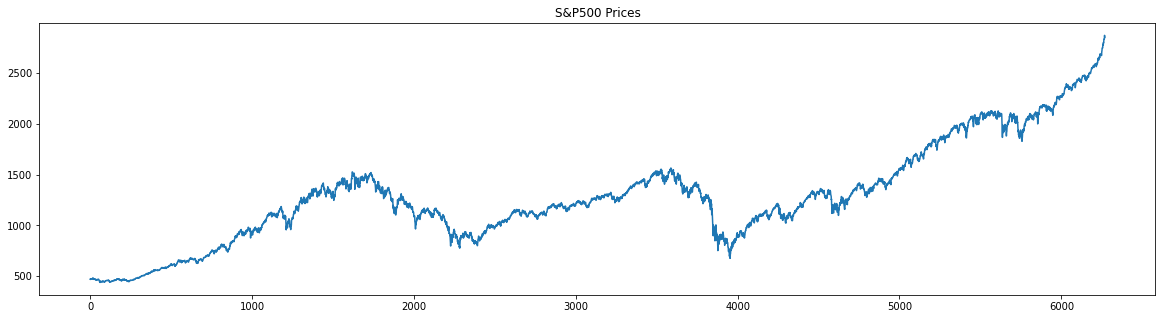

In [11]:
df_comp.spx.plot(figsize=(20,5), title = "S&P500 Prices")
plt.show() #es para que no salgan los mensajes de donde proviene el ploteo

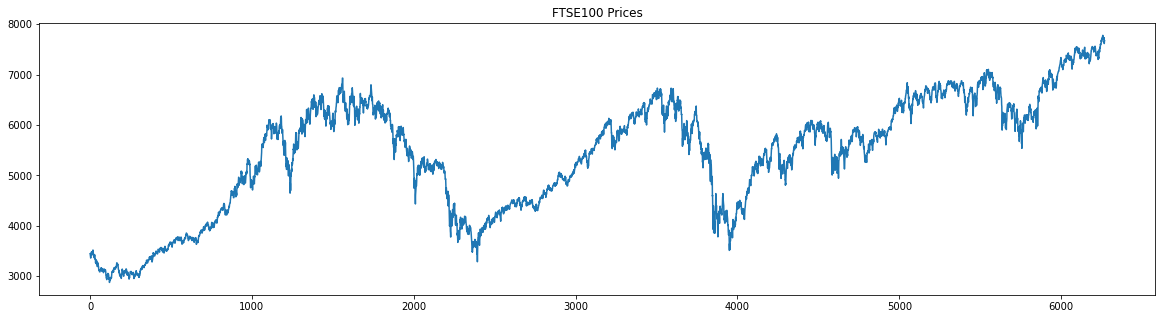

In [12]:
df_comp.ftse.plot(figsize=(20,5), title = "FTSE100 Prices")
plt.show()

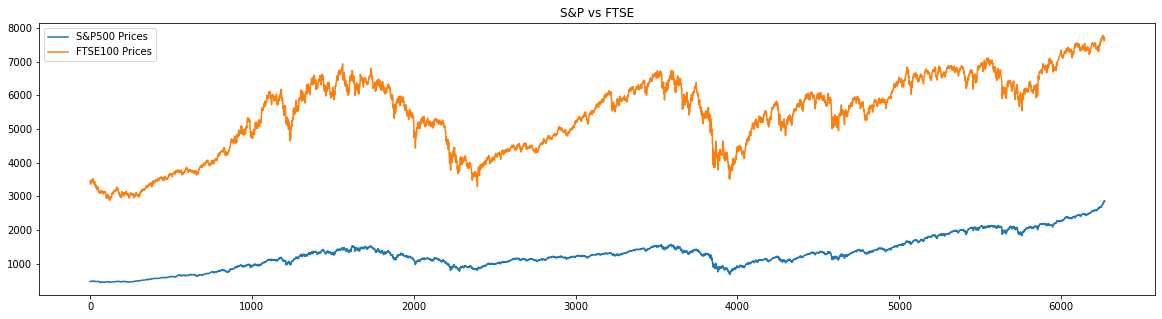

In [15]:
df_comp.spx.plot(figsize=(20,5), label = "S&P500 Prices")
df_comp.ftse.plot(figsize=(20,5), label = "FTSE100 Prices")
plt.legend()
plt.title("S&P vs FTSE")
plt.show()

### The QQ Plot
Gráfico Quantile-Quantile, es una herramienta de la análisis de datos que se utiliza para explicar si un conjunto de datos se distribute de cierta manera, a menos que se especifique lo contrario la gráfica muestra usualmente si los datos se ajustan a una distribución normal.

In [16]:
import scipy.stats


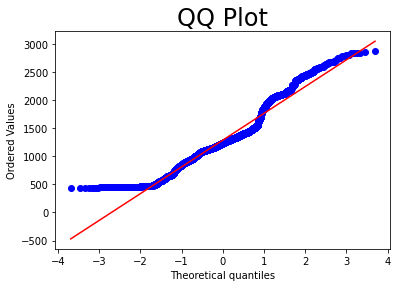

In [17]:
scipy.stats.probplot(df_comp.spx, plot =  plt)
plt.title("QQ Plot", size = 24)
plt.show()

Los puntos azules en el gráfico son los valores de precios spx, ordenados de menor a mayor (eje Y), en el eje Y, tenemos los cuantiles, es tos nos indica cuán alejados estamos del valor central o promedio, para formar la campana de Gauss (o distribución normal). La línea roja nos indica que si los puntos azules se distribuyen a través de ella significan que siguen una distribución normal y podremos aplicar los métodos de esta distribución para nuestros datos. PERO PARA ESTE CASO NO PODEMOS YA QUE NO ESTÁN DISTRIBUIDOS DE ESTA MANERA, Y EN LA MAYORÍA DE DATOS DE SERIES TEMPORALES NO SEGUIRÁN DICHA DISTRIBUCIÓN.